### Importing Libraries and mounting Google drive

In [42]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS, get_single_color_func
import math 
import collections
import matplotlib.pyplot as plt

In [43]:
from google.colab import drive # for running on colab
drive.mount('/content/drive') # for running on colab

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Loading dataset

In [44]:
df = pd.read_csv("/content/drive/Shareddrives/Capstone/Final_Analysis/posts_with_sentiment_score.csv") # for running on colab
#df = pd.read_csv("posts_with_sentiment_score.csv") # for running locally
df.head(1)

,full_link,subreddit,post keywords,date,score,num_comments,author,title,selftext,top_comment,comment_score,keywords,sentiment_score
0,https://www.reddit.com/r/whatcarshouldIbuy/com...,whatcarshouldIbuy,NaN,2014-01-01,1.0,2.0,ground_sniper,Thoughts on 1989 Toyota Supra 7M-GE,"Title says it all, owner is asking $1500 body ...","They are. The M-series engines are simple, ru...",1.0,"{'engine', ' ', 'worth', 'supra', 'say', 'dece...",1.0


### Chacking for Balance
-  as you can see it is not balanced

In [45]:
df['keywords'][df['sentiment_score'] <0].shape

(30688,)

In [46]:
df['keywords'][df['sentiment_score'] >0].shape

(88950,)

In [47]:
df['keywords'][df['sentiment_score'] == 0].shape

(24253,)

### preparing keyword column

In [48]:
#changing keyword "set" to list
df['keywords'] = df['keywords'].apply(lambda x: list(eval(x)))

### Preparing WordCloud

In [49]:
def sentiment_per_keyword(dataframe):
    # lists to store the keywords in
    positive_keywords = []
    negative_keywords = []
    neutral_keywords = []

    # empty string to later store keywors for the wordcloud
    sentiment_adjusted_keywords = ' '
    negative_adjusted_keywords = ' '
    positive_adjusted_keywords = ' '

    # storing keywords 
    for words, sentiment_score in zip(dataframe.keywords, dataframe.sentiment_score):

        if sentiment_score == 0:
            neutral_keywords.extend(words)

        elif sentiment_score > 0:
            positive_keywords.extend(words * math.ceil(sentiment_score))

        elif sentiment_score < 0:
            negative_keywords.extend(words * abs(math.floor(sentiment_score)))
    
    
    dict_positive = collections.Counter(positive_keywords)
    dict_negative = collections.Counter(negative_keywords)

    positive = []
    negative = []
    
    ### for fred to find most positive and negative words
    # most_positive = []
    # most_negative = []
    ###
    
    all_words = set(positive_keywords + negative_keywords + neutral_keywords)
    
    for word in all_words:
        
        suffix = "nan"
        if word.endswith(suffix):
          word = word[:-len(suffix)]

        score = 0

        score -= dict_negative.get(word, 0)
        score += dict_positive.get(word, 0)

        if score == 0:
            sentiment_adjusted_keywords += " ".join([word])+" "

        elif score > 0:
            positive.append(word)
            
            ### for fred to find most positive and negative words
            # most_positive.extend(words * math.ceil(score))
            ###
            
            positive_adjusted_keywords += " ".join([word] * math.ceil(score))+" "
            sentiment_adjusted_keywords += " ".join([word] * math.ceil(score))+" "

        elif score < 0:
            negative.append(word)
            
            ### for fred to find most positive and negative words
            # most_negative.extend(words * abs(math.floor(score*-1)))
            ### 
            
            negative_adjusted_keywords += " ".join([word] * abs(math.floor(score*-1)))+" "
            sentiment_adjusted_keywords += " ".join([word] * abs(math.floor(score*-1)))+" "
    
    ### for fred to find most positive and negative words
    # most_positive 
    # most_negative 
    ###

    return negative_adjusted_keywords, positive_adjusted_keywords, sentiment_adjusted_keywords, positive, negative

### WordCloud colour algorithm

In [50]:
class GroupedColorFunc(object):
    """Create a color function object which assigns DIFFERENT SHADES of
       specified colors to certain words based on the color to words mapping.

       Uses wordcloud.get_single_color_func

       Parameters
       ----------
       color_to_words : dict(str -> list(str))
         A dictionary that maps a color to the list of words.

       default_color : str
         Color that will be assigned to a word that's not a member
         of any value from color_to_words.
    """

    def __init__(self, color_to_words, default_color):
        self.color_func_to_words = [
            (get_single_color_func(color), set(words))
            for (color, words) in color_to_words.items()]

        self.default_color_func = get_single_color_func(default_color)

    def get_color_func(self, word):
        """Returns a single_color_func associated with the word"""
        try:
            color_func = next(
                color_func for (color_func, words) in self.color_func_to_words
                if word in words)
        except StopIteration:
            color_func = self.default_color_func

        return color_func

    def __call__(self, word, **kwargs):
        return self.get_color_func(word)(word, **kwargs)

### WordCloud

In [71]:
def draw_wordcloud(dataframe):
    
    negative_adjusted_keywords, positive_adjusted_keywords, sentiment_adjusted_keywords, positive, negative = sentiment_per_keyword(dataframe)

    stopwords = set([' \\n', '\\n', ' ', 'good', 'really', 'look', 'get', 'work', 'seem','like', 'car', 'guy',
                'great', 'need', 'first', 'also', 'much', 'buy', 'drive', 'get', 'new', 'price', 'feature',
                'would', 'love', 'something', 'make', 'mile', 'long', 'year', 'want', 'market',
                'use', 'fun', 'take', 'cost', 'thank', 'deal', 'know', 'go', 'budget', 'well', 'live', 'model',
                'descent', 'advice', 'problem', 'break', 'time', 'fit', 'think',
                'preferably', 'reliable', 'maintenance', 'around', 'm', 's', 'transmission', 'driving', 'old',
                'right', 'feel', 'seat', '11', 'many', 'concern', 'come', 'keep', 'many', 'opinion', 'help', 'nothing',
                'cari', 'high', 'find', 'try', 'thing', 'across', 'accident', 'daily', 'replace', 'back', 'see', 'credit',
                'trade', 'possible', 'people', 'system', 'upgrade', 've', 'last', 'nice', 'trip', 'everything', 'example',
                 'etc', 'insight', 'even', 'decide', 'curious', 'ask', 'low', 'hard', 'seller', 'dealer', 'early', 'though',
                 'consider', 'due', 'job', 'private', 'life', 'review', 'issue', 'could', 'size', 'currently', 'toward',
                 'school', 'offer', 'read', 'two', 'month', 'show', 'regular', 'advance', 'si', 'fairly','reason',
                 'pretty', 'll', 'grand', 'run', 'con', 'set', 'area', 'fusion', 'especially', 'two', 'everyone',
                 'wife', 'narrow', 'likely', 'every', 'since', 'ga', 'give', 'wagon', 'leave', 'lot', 'prefer', 'experience',
                 'put', 'spend', 'dealership', 'somewhat', 'hp', 'ago', 'either', 'suggestion', 'okay', 'input', 'another', 'amount',
                 'anything', 'auto', 'reddit', 'fix', 'purchase', 'overall', 'edit', 'bad', 'towards',
                 'value', 'fine', 'major', 'welcome', 'yet', 'college', 'type', 'wonder', 'decent', 'option', 'hope',
                 'note', 'tear', 'half', 'less', 'say', 'lean', 'learn', 'city', 'eye', 'easy', 'sometime', 'line', 'follow',
                 'mostly', 'fan', 'plenty', 'payment', 'town', 'inside', 'tax', 'question', 'brand', 'dollar', 'probably', 
                 'view', 'let', 'basically', 'absolutely', 'home', 'cash', 'anyway', 'trouble', 'afford', 'ok', 'day',
                 'bring', 'avoid', 'weather', 'hour', 'recommendation', 'else', 'buyer', 'cause', 'occasional', 'limit',
                 'guess', 'cruise', 'parent', 'project', 'test', 'minor', 'thought', 'serie', 'student', 'plan', 'control',
                 'crazy', 'total', 'wheel', 'whatever', 'rather', 'series', 'stuff', 'someone', 'hopefully','true', 'fuel',
                 'may', 'negotiate', 'difference', 'current', 'se' 'end', 'almost', 'thinking', 'anyone', 'appreciate',
                 'title', 'tall', 'excellent', 'second', 'start', 'family', 'different', 'possibly', 'save',
                 'd', 'free', 'talk', 'extremely', 'mainly', 'awesome', 'choice', 'requirement', 'recommend', 'state',
                 'reasonable', 'graduate', 'far', 'expect', 'relatively', 'part', 'soon', 'door', 'next', 'worth', 'bit',
                 'end', 'road', 'maybe', 'interest', 'kind', 'must', 'hear',  'search', 'sure', 'driver', 'money',
                 'little', 'vehicle', 'enough', 'however', 'mind', 'still', 'actually', 'list', 'clearance', 'way', 'sit',
                 'enjoy', 'backup', 'couple', 'week', 'anybody', 'tomorrow', 'termn', 'pay', 'easily', 'choose', 'base',
                 'point', 'recently', 'buying', 'whether', 'sub', 'tech', 'colorado', 'friend', 'specifically', 'never',
                 'craigslist', 'intend', 'euro', 'past', 'website', 'idea', 'factor', 'priority', 'general', 'sell', 
                 'ideally','interested', 'ton', 'person', 'open', 'trim', 'already', 'miss', 'require', 'light', 'term', 'willing',
                 'post', 'economy', 'stay', 'passenger', 'defenitely', 'compare', 'suggest', 'maintain', 'front', 'turn', 'worry',
                 'ever', 'decision', 'least', 'handel', 'able', 'mean', 'ill', 'availiable', 'important', 'shop', 'often', 'similar',
                 'although', 'hate', 'quite', 'might','one'

                ])
  
    color_to_words = {
    # will be colored with a red single color function
    'red': negative, 
    # words below will be colored with a green single color function
    '#00ff00': positive,
    }
    
    for sentiment_keywords in [negative_adjusted_keywords, positive_adjusted_keywords]: 
    
      # Words that are not in any of the color_to_words values
      # will be colored with a grey single color function
        default_color = 'grey'

      # Create a color function with multiple tones
        grouped_color_func = GroupedColorFunc(color_to_words, default_color)

        wordcloud = WordCloud(
          width = 800, height = 800,
          background_color ='white',
          stopwords = stopwords,
          min_font_size = 10,
          collocations=False
        #).generate(sentiment_adjusted_keywords)
        ).generate(sentiment_keywords)
            
        # Apply color function
        wordcloud.recolor(color_func=grouped_color_func)

        # plot the WordCloud image                      
        plt.figure(figsize = (8, 8), facecolor = None)
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis("off")
        plt.tight_layout(pad = 0)

        plt.show()

### Filter dataframe

In [72]:
def find_query_in_keywords(keywords, query):
    
    if all(word in keywords for word in query):
        
        # removing query from keywords -  not sure if this makes it any better
        #keywords = [item for item in keywords if item not in query]
        
        return keywords
    
    else:
        return float('nan')
                                                   

In [114]:
## enter your query here
query = ['north', 'carolina']

query_df = df.copy()
query_df['keywords'] = query_df['keywords'].apply(lambda keywords: find_query_in_keywords(keywords, query))
query_df = query_df[query_df['keywords'].notna()]

print(f"There are {query_df.shape[0]} results to your query")

There are 108 results to your query


### Draw WordCloud

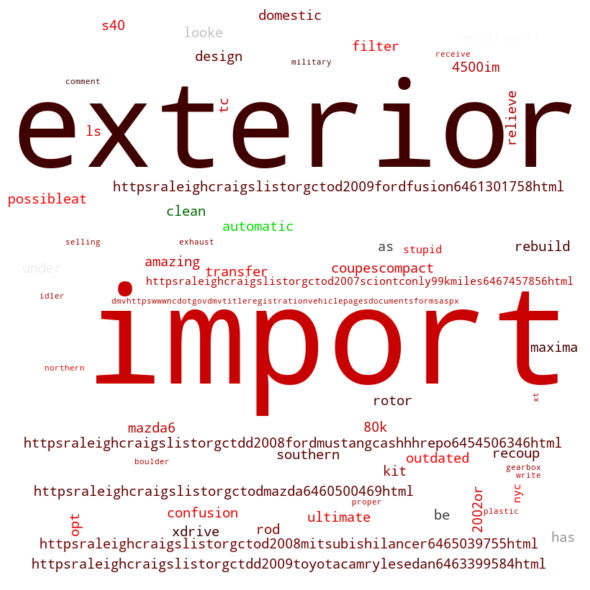

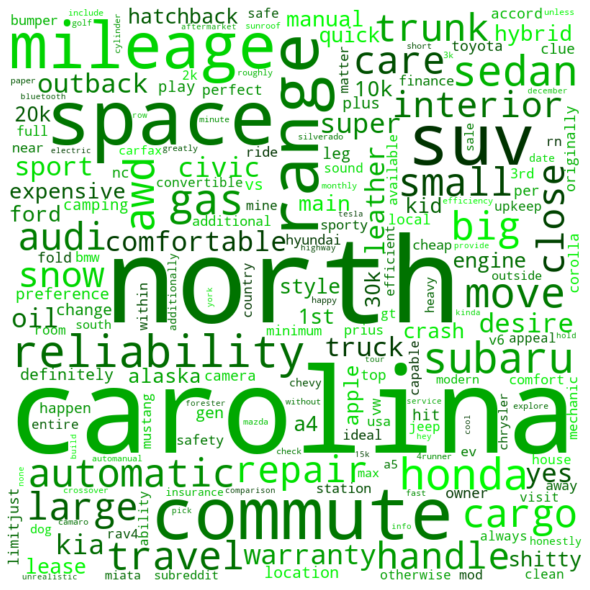

In [115]:
draw_wordcloud(query_df)